In [1]:
# from __future__ import print_function, division

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [42]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [41]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

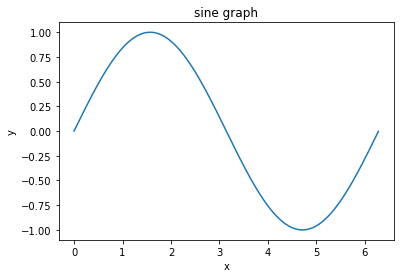

In [31]:
# TODO write code here to setup arrays x and y = sin(x) and then plot them by calling plot_fn
x = np.arange(0,2*np.pi,0.01)
y=np.sin(x)
plot_fn(x,y,'sine graph')

In [45]:
# TODO then integrate y 
integrate(y,1)

-0.0010853464617828642


-0.0010853464617828642

In [43]:
# TODO now use a np function to integrate y and compare
integral=np.trapz(y,x)
print(integral)

5.073044348824496e-06


In [50]:
# TODO find local maxima and minima of sinx from 0 to 6*pi
xx= np.arange(0,6*np.pi,0.01)
yy=np.sin(x)
maximum=np.amax(yy)
minimum=np.amin(yy)
print(maximum, minimum)

0.9999996829318346 -0.999997146387718


# Part 2

In [74]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [75]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [90]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """

    # TODO edit this function
    y_fft = np.fft.rfft(y_values)
    
    low_pass_filter = np.ones(y_fft.shape) # build low pass filter for Fourier function
    num_freq = y_fft.size
    low_pass_filter[int(num_freq/25):num_freq] = 0
    
    multiplication=np.multiply(y_fft,low_pass_filter)
    y_clean_values=np.fft.irfft(multiplication,y_values.size)
    
    return y_clean_values

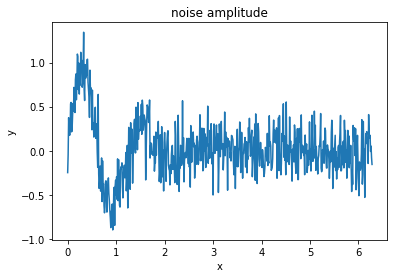

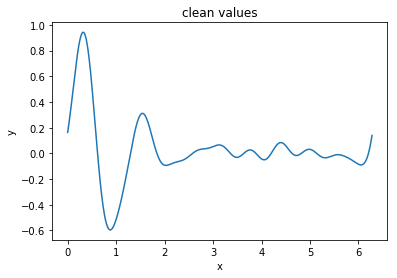

In [91]:
# TODO call noisy_packet() to get a Gaussian wave packet, 
noise=noisy_packet(x,5,1,0.2)
plot_fn(x, noise, 'noise amplitude')

# call clean_data() to apply a low pass filter to the data, and
# finally plot the result using plot_fn
plot_fn(x, clean_data(x, noise), "clean values")

# Part 3

In [15]:
# TODO mask the arrays, then plot

In [16]:
# TODO try to generate masked noisy data and then clean it